In [1]:
import pandas as pd
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print(torch.__version__)
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0) if torch.cuda.is_available() else "CUDA not available")

2.7.1+cu126
True
NVIDIA GeForce RTX 3080 Ti


In [3]:
df = pd.read_pickle('/data/bearing_datasets/ottawa/processed/full_dataset.bz2')


In [ ]:
df.head(2)
#waveforms id format: number of the bearing, followed by the fault type,
# followed by severity (Healthy - 0, developing - 1, fault - 2)i

,waveform_id,bearing_id,fault_type,severity,load,rpm,fs,bpfo,bpfi,bsf,ftf,vibration,acoustic,temp_diff,inner,outer,ball,cage
0,16_Healthy_0,16,Healthy,0,400,1780,42000,3.05,4.95,1.986,0.381,"[-7.696933, -7.632468, -7.664701, -7.858096, -...","[0.03163, 0.030972, 0.030315, 0.029986, 0.0299...","[1.311329, 0.983149, 0.0, 0.327601, 0.0, 0.818...",0,0,0,0
1,2_Healthy_0,2,Healthy,0,400,1800,42000,3.05,4.95,1.986,0.381,"[193.402454, 192.7578, 191.726353, 190.662674,...","[2.028597, 2.029583, 2.030898, 2.031556, 2.032...","[1.478118, 0.655895, 0.164235, 0.32818, 0.0, 1...",0,0,0,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   waveform_id  60 non-null     object 
 1   bearing_id   60 non-null     object 
 2   fault_type   60 non-null     object 
 3   severity     60 non-null     object 
 4   load         60 non-null     int64  
 5   rpm          60 non-null     int64  
 6   fs           60 non-null     int64  
 7   bpfo         60 non-null     float64
 8   bpfi         60 non-null     float64
 9   bsf          60 non-null     float64
 10  ftf          60 non-null     float64
 11  vibration    60 non-null     object 
 12  acoustic     60 non-null     object 
 13  temp_diff    60 non-null     object 
 14  inner        60 non-null     int64  
 15  outer        60 non-null     int64  
 16  ball         60 non-null     int64  
 17  cage         60 non-null     int64  
dtypes: float64(4), int64(7), object(7)
memory usage: 8.6

In [ ]:
df['fs'].value_counts().sort_index(), df['fault_type'].value_counts().sort_index()

(fs
 42000    60
 Name: count, dtype: int64,
 fault_type
 Ball       10
 Cage       10
 Healthy    20
 Inner      10
 Outer      10
 Name: count, dtype: int64,
 60)

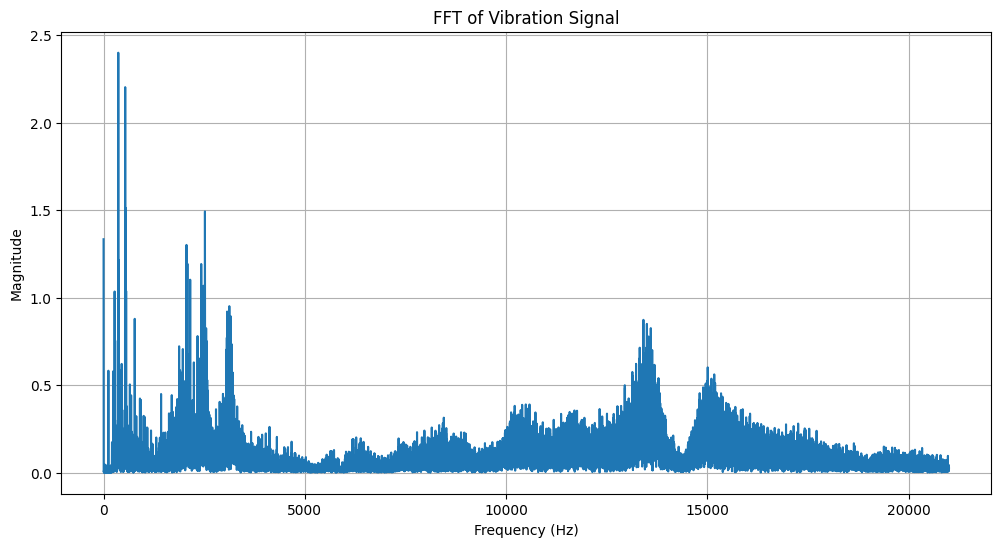

In [9]:
# 21 is faulty
x = df['vibration'].iloc[21]  
type(x), len(x)
fs = df['fs'].iloc[21]  # Sampling frequency
rpm = df['rpm'].iloc[21]
shaft_freq_hz = rpm / 60  # Converts RPM to Hz
#bpfo
bpfo_hz = df['bpfo'].iloc[21]*shaft_freq_hz  # Ball Pass Frequency Outer
#bpfi
bpfi_hz = df['bpfi'].iloc[21]*shaft_freq_hz  # Ball Pass Frequency Inner
#bsf
bsf_hz = df['bsf'].iloc[21]*shaft_freq_hz  # Ball Spin Frequency
T = 1 / fs  # Sampling period
t_needed = 1  # seconds of data needed
x = x[:int(t_needed * fs)]  # Truncate 
t_ = np.arange(0, t_needed, T)  # Time vector
sp = np.fft.fft(x)
freq = np.fft.fftfreq(len(sp), T)
plt.figure(figsize=(12, 6))
plt.plot(freq[:len(freq)//2], 2*np.abs(sp[:len(sp)//2]) / len(x))
plt.title('FFT of Vibration Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid()
plt.show()

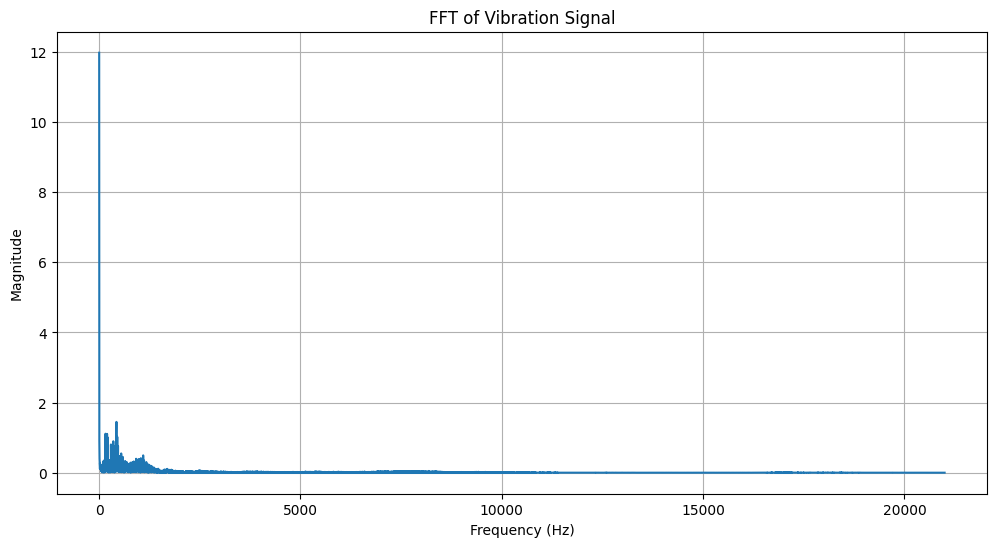

In [10]:
# 0 is healthy
x = df['vibration'].iloc[0]  
type(x), len(x)
fs = df['fs'].iloc[0]  # Sampling frequency
T = 1 / fs  # Sampling period
t_needed = 1  # seconds of data needed
x = x[:int(t_needed * fs)]  # Truncate to the needed time
t_ = np.arange(0, t_needed, T)  # Time vector
sp = np.fft.fft(x)
freq = np.fft.fftfreq(len(sp), T)
plt.figure(figsize=(12, 6))
plt.plot(freq[:len(freq)//2], 2*np.abs(sp[:len(sp)//2]) / len(x))
plt.title('FFT of Vibration Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid()
plt.show()